In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from io import BytesIO

In [3]:
# Завантаження даних Iris
iris = load_iris()
X, y = iris.data, iris.target

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
clf = RidgeClassifier(tol=1e-2, solver="sag")
clf.fit(Xtrain, ytrain)


RidgeClassifier(solver='sag', tol=0.01)

In [9]:
ypred = clf.predict(Xtest)


In [11]:
# Оцінка якості моделі
print('Accuracy:', np.round(metrics.accuracy_score(ytest, ypred), 4))
print('Precision:', np.round(metrics.precision_score(ytest, ypred, average='weighted'), 4))
print('Recall:', np.round(metrics.recall_score(ytest, ypred, average='weighted'), 4))
print('F1 Score:', np.round(metrics.f1_score(ytest, ypred, average='weighted'), 4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(ytest, ypred), 4))
print('Matthews Corrcoef:', np.round(metrics.matthews_corrcoef(ytest, ypred), 4))

Accuracy: 0.7556
Precision: 0.8333
Recall: 0.7556
F1 Score: 0.7503
Cohen Kappa Score: 0.6431
Matthews Corrcoef: 0.6831


In [13]:
print('\nClassification Report:\n', metrics.classification_report(ytest, ypred))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.44      0.59        18
           2       0.50      0.91      0.65        11

    accuracy                           0.76        45
   macro avg       0.80      0.78      0.75        45
weighted avg       0.83      0.76      0.75        45



In [15]:
mat = confusion_matrix(ytest, ypred)

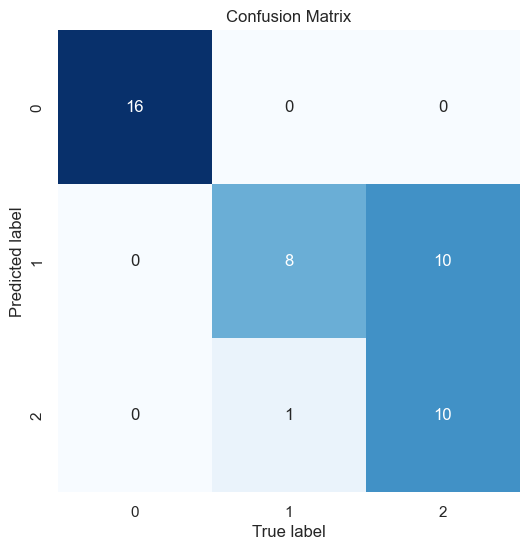

In [17]:
sns.set()
plt.figure(figsize=(7, 6))
sns.heatmap(mat, annot=True, fmt='d', cmap="Blues", cbar=False, square=True)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix')
plt.savefig("Confusion.jpg")